
<div style="font-size: 18pt;">Classification and Regression Tree (CART)</div><br/>

- Load sklearn diabetes dataset, which describes a regression problem<br/>
- Split into train/test<br/>
- Estimate linear regression, plot actual vs.predicted, calculate RMSE for the test set<br/>
- Train regression CART model, plot actual vs.predicted, calculate RMSE for the test set<br/>
- Try different parameters and prunning<br/>
- What is the conclusion? Should we use linear regression or CART for this problem.

In [1]:
#load necessary packages
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import set_config
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [2]:
#load data
#https://scikit-learn.org/stable/datasets/toy_dataset.html
db = datasets.load_diabetes()
pd.DataFrame(db.data, columns=db.feature_names ).head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


## Linear regression no optimisation

In [3]:
X = pd.DataFrame(db.data, columns=db.feature_names) 
y = pd.DataFrame(db.target, columns=['Progress']) 
X.shape, y.shape

((442, 10), (442, 1))

In [4]:
#create train/test set, use the same random_state = 1234
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

54.5475666429868

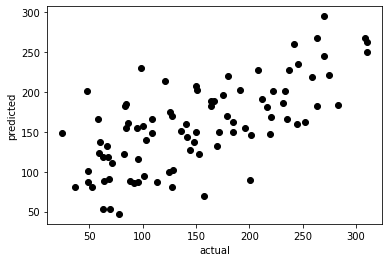

In [5]:
#estimate linear regression, check RMSE, explain what it means using domain-specific language, 
#i.e. referring to the diabetes

mod = sm.OLS(y_train, x_train)
result = mod.fit()
y_pred = result.predict(x_test)


plt.plot(y_test, y_pred, 'o', color='black');
plt.xlabel("actual"); plt.ylabel("predicted"); 
metrics.mean_squared_error(y_test, y_pred, squared=False)

In [6]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Progress   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     38.12
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           7.15e-50
Time:                        17:38:09   Log-Likelihood:                -1905.0
No. Observations:                 353   AIC:                             3832.
Df Residuals:                     342   BIC:                             3875.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.4797      2.892     53.077      0.000     147.792     159.167
age          -43.4553     66.317     -0.655      0.513    -173.897      86.986
sex         -280.5585     67.500     -4.156      0.000    -413.325    -147.792
bmi          528.9789     76.568      6.909      0.000     378.376     679.582
bp           346.5002     72.991      4.747      0.000     202.932     490.068
s1         -1032.3297    477.084     -2.164      0.031   -1970.718     -93.941
s2           661.5778    385.229      1.717      0.087     -96.138    1419.294
s3           241.0864    241.920      0.997      0.320    -234.753     716.926
s4           240.5299    180.683      1.331      0.184    -114.861     595.920
s5           798.2632    197.781      4.036      0.000     409.243    1187.283
s6           123.1693     74.497      1.653      0.099     -23.361     269.700
==============================================================================
Omnibus:                        1.776   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.596
Skew:                           0.046   Prob(JB):                        0.450
Kurtosis:                       2.684   Cond. No.                         232.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear regression some parameters excluded

In [11]:
X = pd.DataFrame(db.data, columns=db.feature_names) 
y = pd.DataFrame(db.target, columns=['Progress']) 
X.shape, y.shape
X = X[['sex', 'bmi', 'bp', 's5']]

In [12]:
#create train/test set, use the same random_state = 1234
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

55.16583393404507

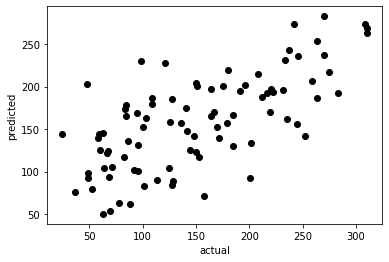

In [13]:
#estimate linear regression, check RMSE, explain what it means using domain-specific language, 
#i.e. referring to the diabetes

mod = sm.OLS(y_train, x_train)
result = mod.fit()
y_pred = result.predict(x_test)


plt.plot(y_test, y_pred, 'o', color='black');
plt.xlabel("actual"); plt.ylabel("predicted"); 
metrics.mean_squared_error(y_test, y_pred, squared=False)

In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Progress   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     84.61
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           4.03e-50
Time:                        17:39:08   Log-Likelihood:                -1917.3
No. Observations:                 353   AIC:                             3845.
Df Residuals:                     348   BIC:                             3864.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.7815      2.967     51.833      0.000     147.946     159.617
sex         -185.3236     64.431     -2.876      0.004    -312.047     -58.600
bmi          625.8846     74.565      8.394      0.000     479.231     772.539
bp           320.7515     71.496      4.486      0.000     180.133     461.370
s5           533.8396     73.029      7.310      0.000     390.205     677.474
==============================================================================
Omnibus:                        5.478   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.541
Skew:                           0.187   Prob(JB):                        0.103
Kurtosis:                       2.589   Cond. No.                         29.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Cart (all parameters)

In [7]:
#drop constant from the x_train and x_test
x_train = x_train.drop(['const'], axis=1)
x_test = x_test.drop(['const'], axis=1)

77.6263739497361

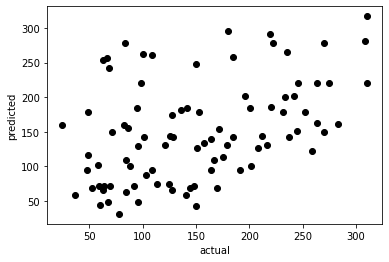

In [8]:
#Train regression CART model with default parameters, plot actual vs. predicted, calculate RMSE

dtr = DecisionTreeRegressor()
dtr = dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)
plt.plot(y_test, y_pred, 'o', color='black');
plt.xlabel("actual"); plt.ylabel("predicted"); 
metrics.mean_squared_error(y_test, y_pred, squared=False)

## CART(no multicollinearity)

In [15]:
#drop constant from the x_train and x_test
x_train = x_train.drop(['const'], axis=1)
x_test = x_test.drop(['const'], axis=1)

71.97221686178632

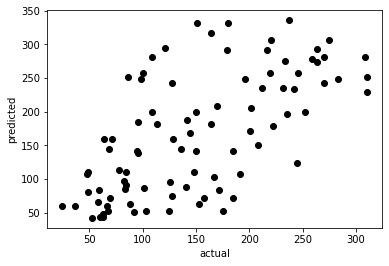

In [16]:
#Train regression CART model with default parameters, plot actual vs. predicted, calculate RMSE

dtr = DecisionTreeRegressor()
dtr = dtr.fit(x_train,y_train)
y_pred = dtr.predict(x_test)
plt.plot(y_test, y_pred, 'o', color='black');
plt.xlabel("actual"); plt.ylabel("predicted"); 
metrics.mean_squared_error(y_test, y_pred, squared=False)

In [17]:
#check your tree parameters
set_config(print_changed_only=False)
dtr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')

# CART(all parameters) pruning

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


60.07653421339983

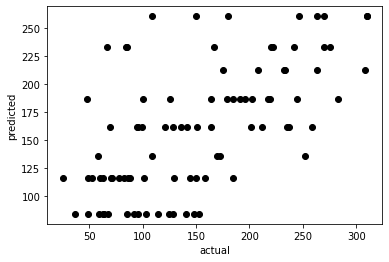

In [9]:
dtr = DecisionTreeRegressor()
params = {
    'max_depth': [2,3,4,5,6],
    'min_samples_leaf': [5,10,20,30,40,50,75,100],
    'ccp_alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5]
}    

#check documentation 
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
grid_search = GridSearchCV(estimator=dtr,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="neg_root_mean_squared_error")

grid_search.fit(x_train, y_train)
dtr_best = grid_search.best_estimator_
dtr_best

y_pred = dtr_best.predict(x_test)
plt.plot(y_test, y_pred, 'o', color='black')
plt.xlabel("actual"); plt.ylabel("predicted")
metrics.mean_squared_error(y_test, y_pred, squared=False)

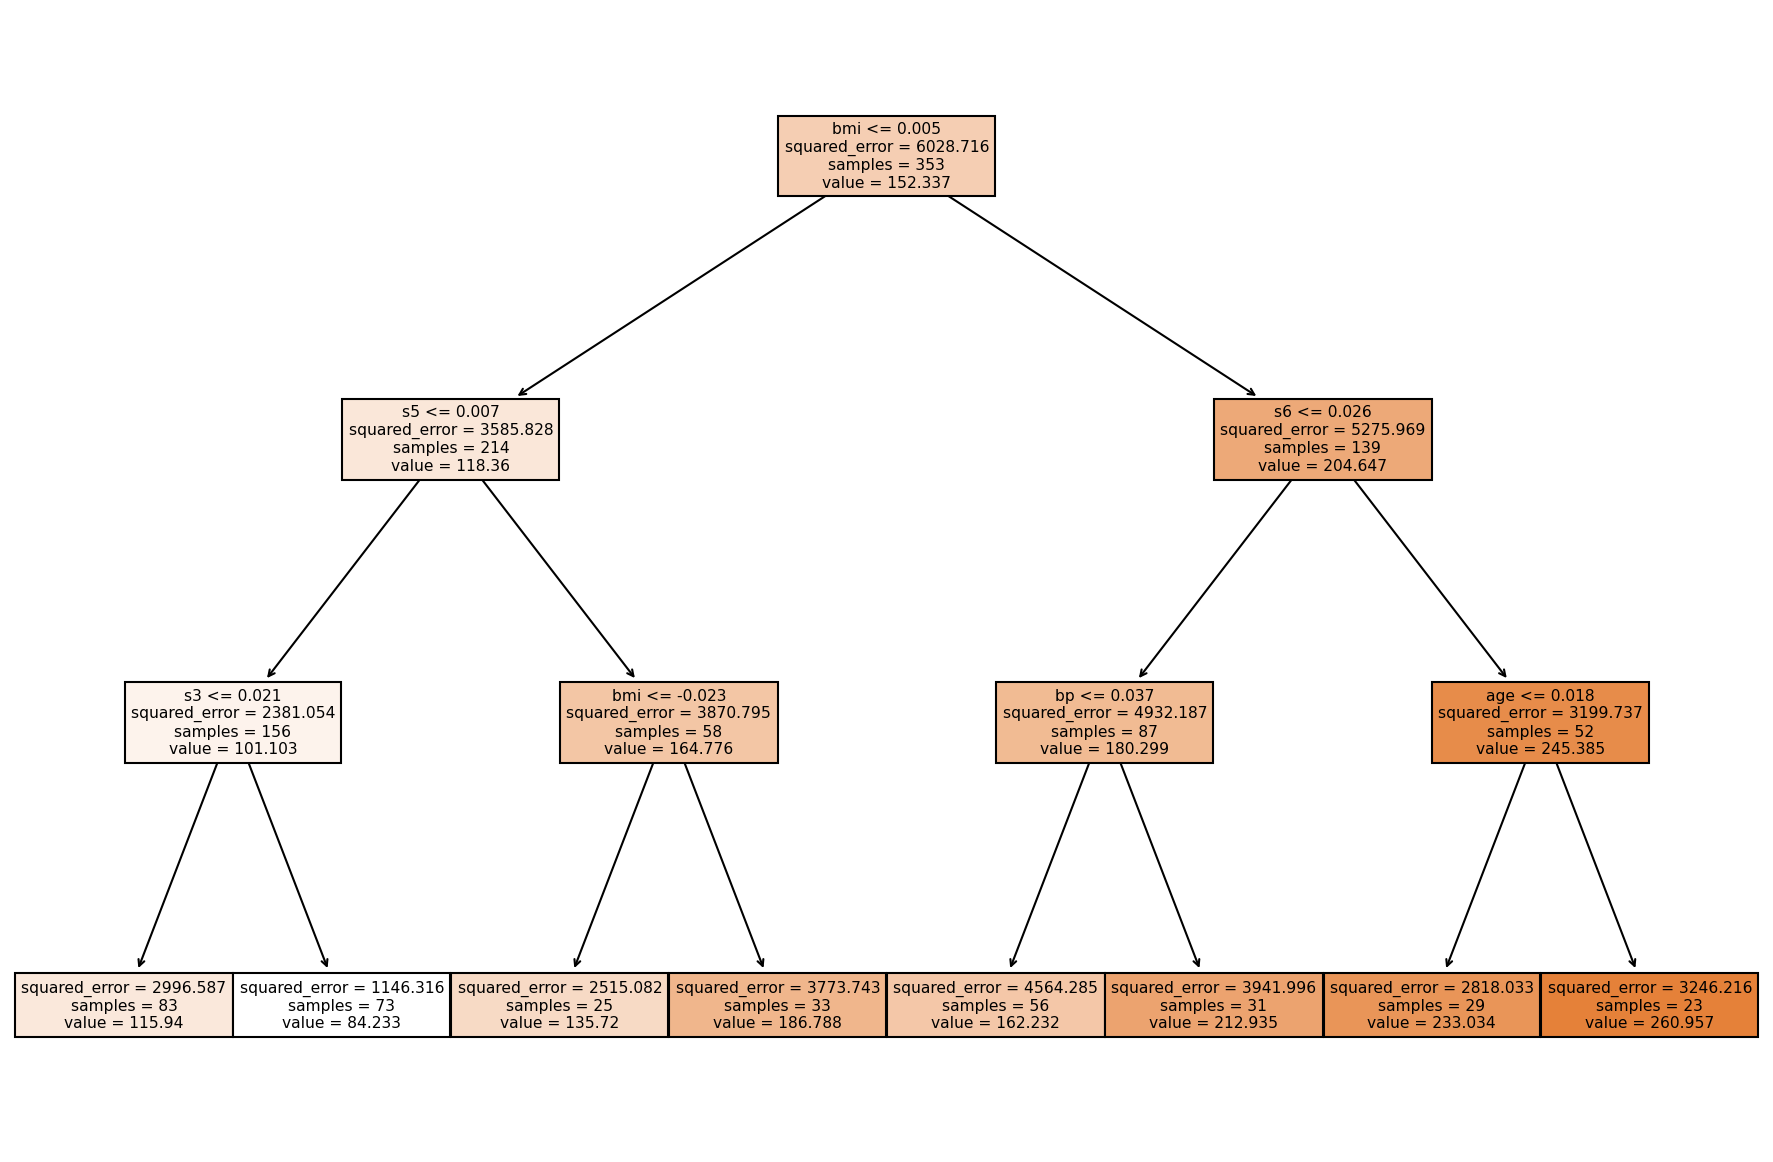

In [10]:
fig = plt.figure(figsize=(15,10), dpi=150)
_ = tree.plot_tree(dtr_best, 
                   feature_names=list(x_train.columns),  
                   filled=True)

# CART(no multicollinearity) pruning

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


55.494074927049894

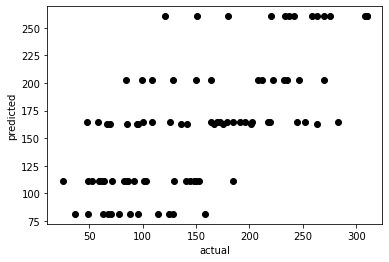

In [18]:
dtr = DecisionTreeRegressor()
params = {
    'max_depth': [2,3,4,5,6],
    'min_samples_leaf': [5,10,20,30,40,50,75,100],
    'ccp_alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5]
}    

#check documentation 
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
grid_search = GridSearchCV(estimator=dtr,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="neg_root_mean_squared_error")

grid_search.fit(x_train, y_train)
dtr_best = grid_search.best_estimator_
dtr_best

y_pred = dtr_best.predict(x_test)
plt.plot(y_test, y_pred, 'o', color='black')
plt.xlabel("actual"); plt.ylabel("predicted")
metrics.mean_squared_error(y_test, y_pred, squared=False)

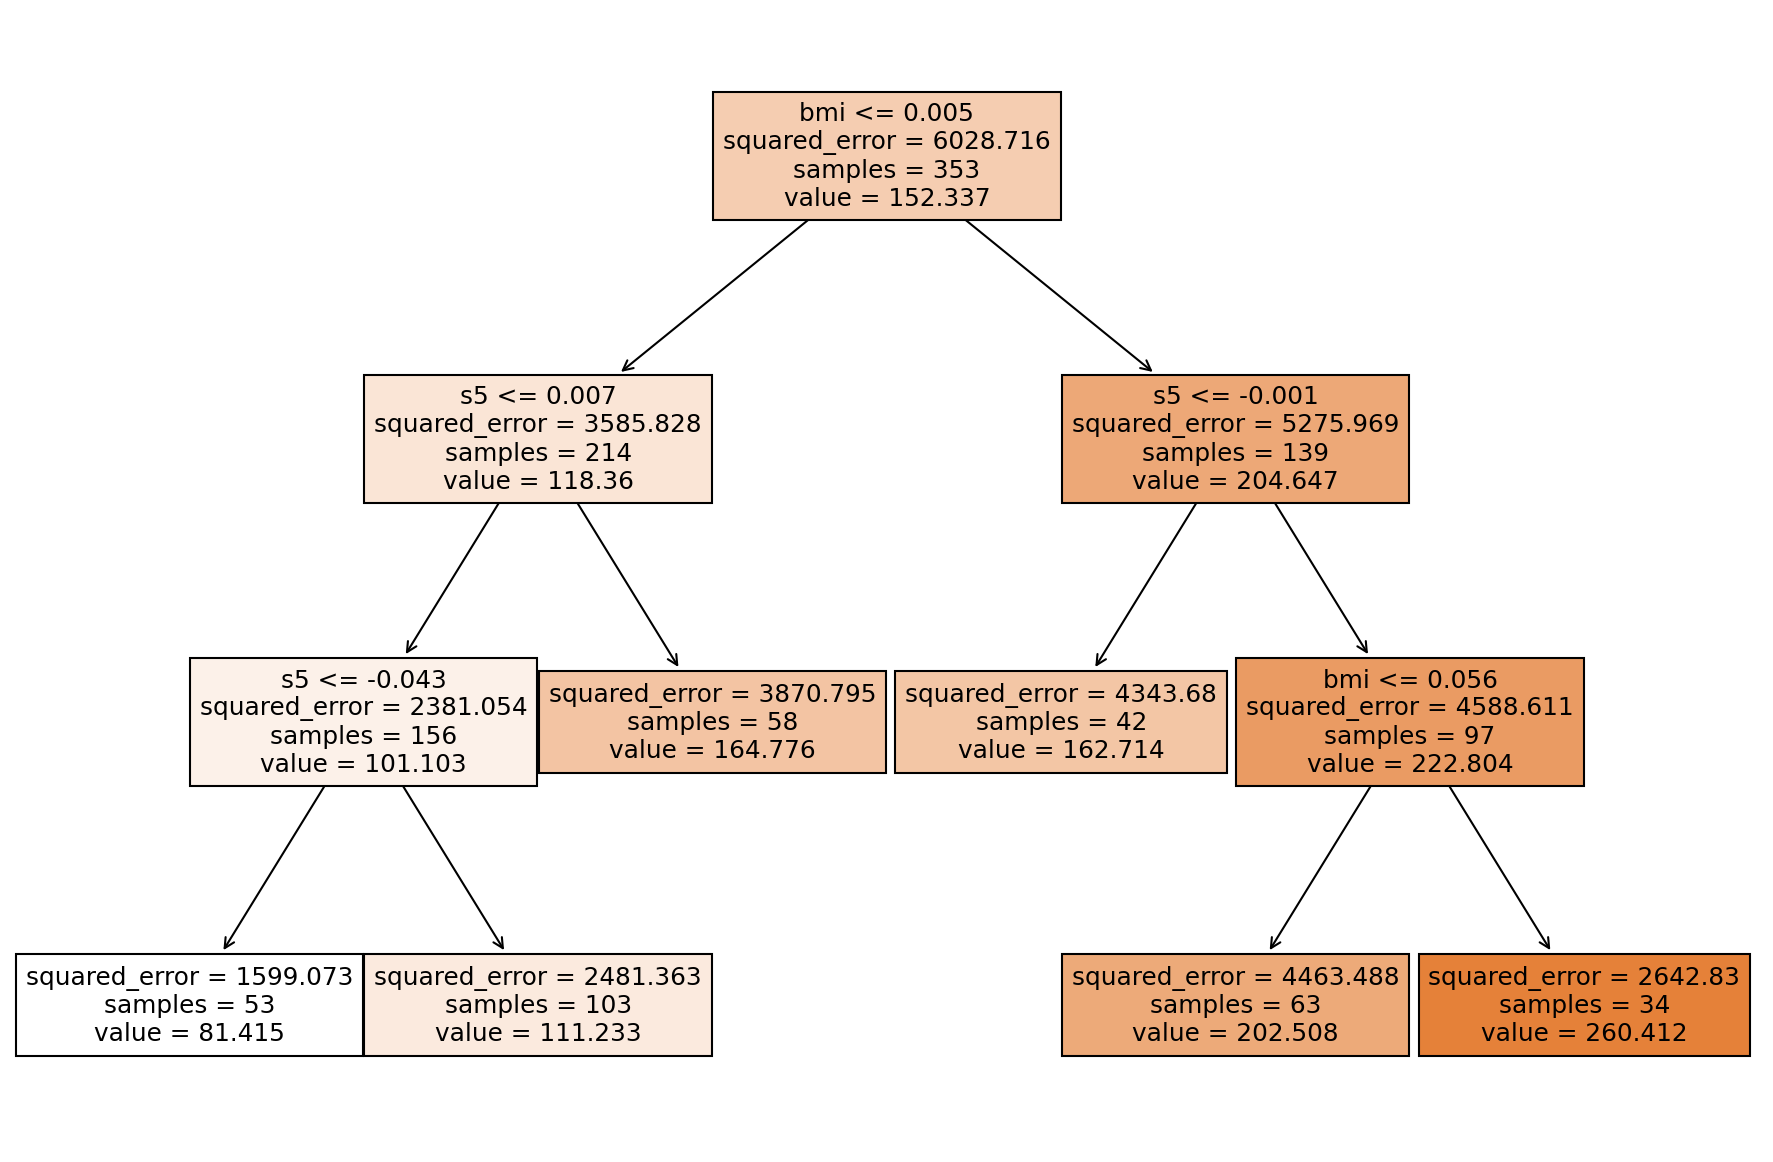

In [19]:
fig = plt.figure(figsize=(15,10), dpi=150)
_ = tree.plot_tree(dtr_best, 
                   feature_names=list(x_train.columns),  
                   filled=True)

In [20]:
#check your tree parameters
set_config(print_changed_only=False)
dtr

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')